# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"


    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | valparaiso
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | brookings
Processing Record 6 of Set 1 | keflavik
Processing Record 7 of Set 1 | klyuchi
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | fale old settlement
Processing Record 10 of Set 1 | uturoa
Processing Record 11 of Set 1 | bako
Processing Record 12 of Set 1 | udachny
Processing Record 13 of Set 1 | smithers
Processing Record 14 of Set 1 | wailua homesteads
Processing Record 15 of Set 1 | ayios konstandinos
Processing Record 16 of Set 1 | port elizabeth
Processing Record 17 of Set 1 | khandyga
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | valley east
City not found. Skipping...
Processing Record 20 of Set 1 | east london
Processing Record 21 of Set 1 | chui
Processing Recor

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,valparaiso,-33.0393,-71.6273,22.78,45,0,6.17,CL,1738863224
1,waitangi,-43.9535,-176.5597,12.12,82,100,0.45,NZ,1738863266
2,port-aux-francais,-49.3500,70.2167,7.71,91,100,12.61,TF,1738862679
3,ushuaia,-54.8000,-68.3000,8.81,76,75,12.86,AR,1738863269
4,brookings,44.3114,-96.7984,-6.97,62,0,12.86,US,1738863270


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,valparaiso,-33.0393,-71.6273,22.78,45,0,6.17,CL,1738863224
1,waitangi,-43.9535,-176.5597,12.12,82,100,0.45,NZ,1738863266
2,port-aux-francais,-49.3500,70.2167,7.71,91,100,12.61,TF,1738862679
3,ushuaia,-54.8000,-68.3000,8.81,76,75,12.86,AR,1738863269
4,brookings,44.3114,-96.7984,-6.97,62,0,12.86,US,1738863270


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

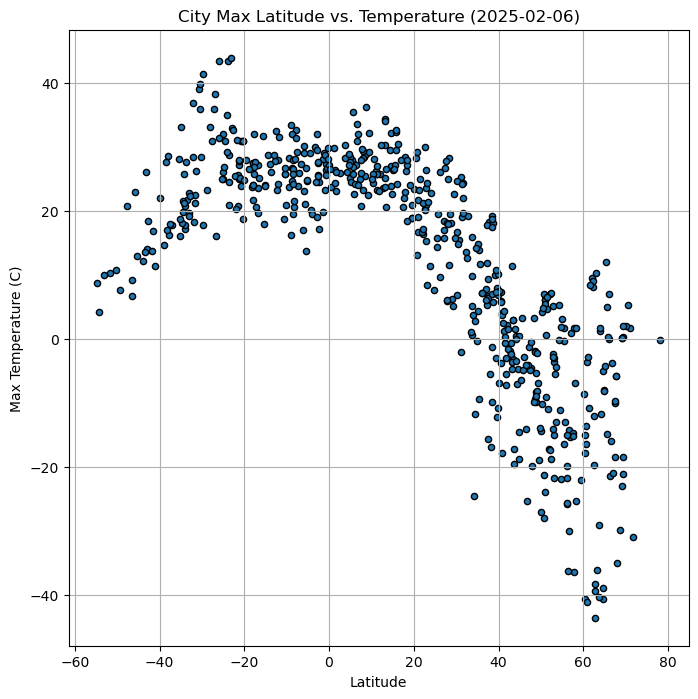

In [8]:
# Build scatter plot for latitude vs. temperature

date = pd.to_datetime(city_date, unit='s').date()
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", edgecolors = "black", xlabel = "Latitude", ylabel = "Max Temperature (C)", grid=True, figsize=(8,8), 
                  title=f"City Max Latitude vs. Temperature ({date})")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

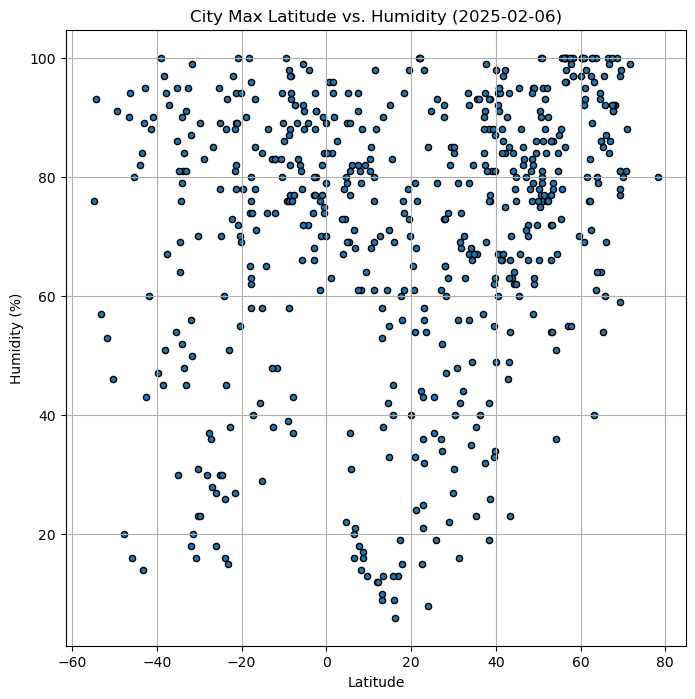

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", edgecolors = "black", xlabel = "Latitude", ylabel = "Humidity (%)", grid=True, figsize=(8,8), 
                  title=f"City Max Latitude vs. Humidity ({date})")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

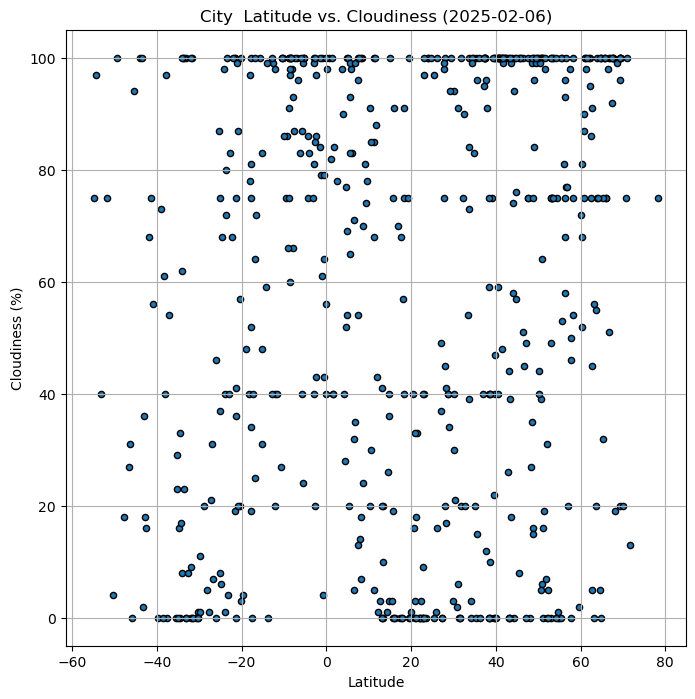

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", edgecolors = "black", xlabel = "Latitude", ylabel = "Cloudiness (%)", grid=True, figsize=(8,8), 
                  title=f"City  Latitude vs. Cloudiness ({date})")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

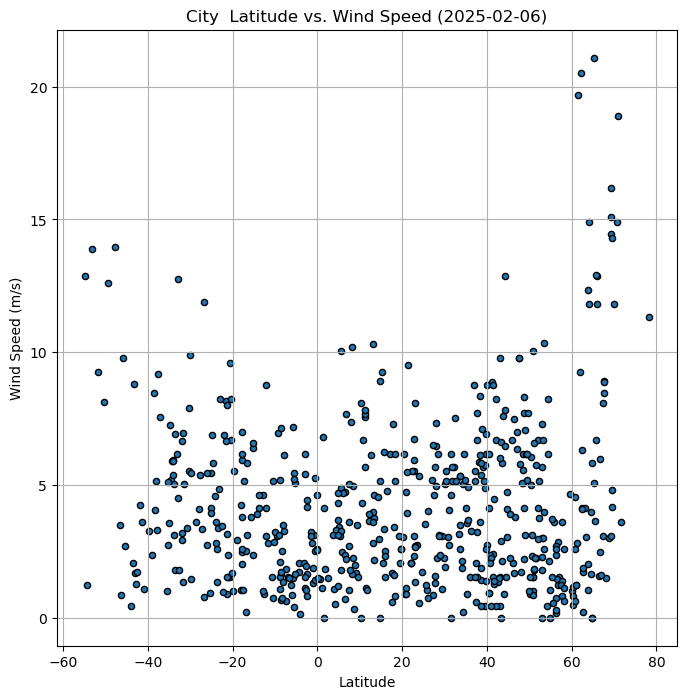

In [11]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", edgecolors = "black", xlabel = "Latitude", ylabel = "Wind Speed (m/s)", grid=True, figsize=(8,8), 
                  title=f"City  Latitude vs. Wind Speed ({date})")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,xy=text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_values.name)
    plt.title(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,brookings,44.3114,-96.7984,-6.97,62,0,12.86,US,1738863270
5,keflavik,64.0049,-22.5624,1.24,80,75,14.92,IS,1738863272
6,klyuchi,52.2667,79.1667,-18.79,90,5,3.75,RU,1738863273
10,bako,5.7833,36.5667,22.59,31,98,2.46,ET,1738863277
11,udachny,66.4167,112.4000,-21.44,100,98,1.56,RU,1738863278


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,valparaiso,-33.0393,-71.6273,22.78,45,0,6.17,CL,1738863224
1,waitangi,-43.9535,-176.5597,12.12,82,100,0.45,NZ,1738863266
2,port-aux-francais,-49.3500,70.2167,7.71,91,100,12.61,TF,1738862679
3,ushuaia,-54.8000,-68.3000,8.81,76,75,12.86,AR,1738863269
7,adamstown,-25.0660,-130.1015,24.97,78,37,5.46,PN,1738863274


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.820446599273269


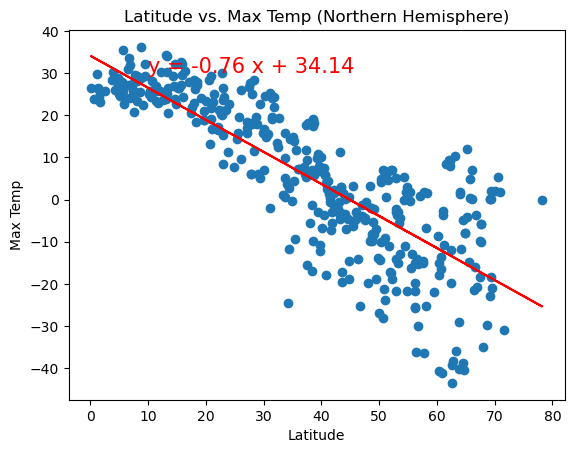

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
title = "Latitude vs. Max Temp (Northern Hemisphere)"

plot_linear_regression(x_values,y_values,title, (10, 30))

In [16]:
#to find out the x and y ranges to plot theline equation
print(f"x range: {x_values.min()} to {x_values.max()}")
print(f"y range: {y_values.min()} to {y_values.max()}")


x range: 0.1333 to 78.2186
y range: -43.54 to 36.25


The r-squared is: 0.399460514825739


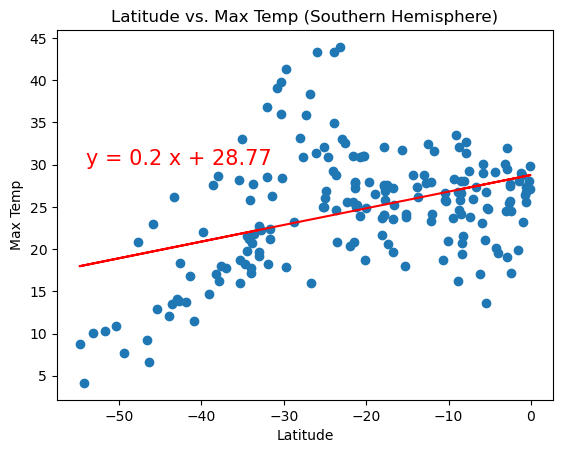

In [17]:

# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
title = "Latitude vs. Max Temp (Southern Hemisphere)"

plot_linear_regression(x_values,y_values, title, (-54, 30))

In [18]:
"""
**Discussion about the linear relationship:**
Max temperature increases the closer you get to the equator. Northern hemisphere temperature is more closely correlated to latitude than
the southern hemisphere, as indicated by the r-value. The temperature values are also more closely correlated based on the distance to the equator. Farther from the equator the data is less uniform for both the northern and southern hemisphere.
"""

'\n**Discussion about the linear relationship:**\nMax temperature increases the closer you get to the equator. Northern hemisphere temperature is more closely correlated to latitude than\nthe southern hemisphere, as indicated by the r-value. The temperature values are also more closely correlated based on the distance to the equator. Farther from the equator the data is less uniform for both the northern and southern hemisphere.\n'

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.39881612614104067


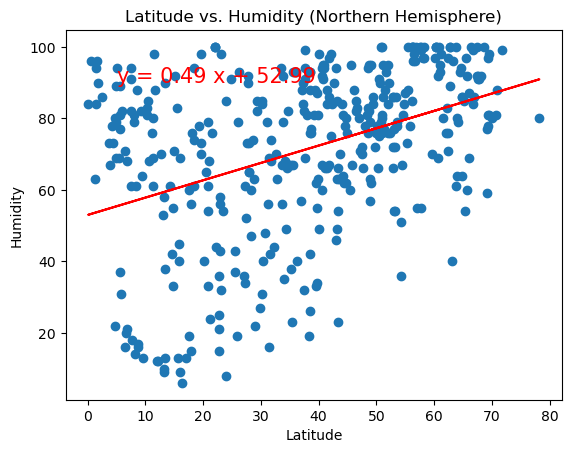

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
title = f"Latitude vs. Humidity (Northern Hemisphere)"

plot_linear_regression(x_values,y_values,title, (5, 90))

The r-squared is: 0.23031618407856833


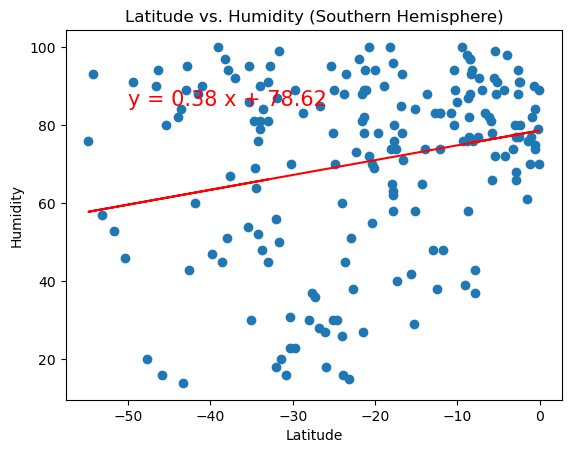

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
title = f"Latitude vs. Humidity (Southern Hemisphere)"

plot_linear_regression(x_values,y_values,title, (-50, 85))


**Discussion about the linear relationship:** Humidity decreases the closer to the equator - this is true for the northern and southern hemisphere. 
r-squared value suggests no strong correlation as they are both closer to 0




### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.19278732707863236


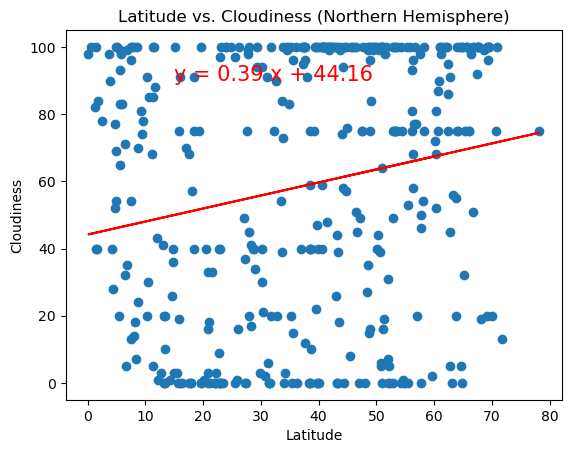

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
title = f"Latitude vs. Cloudiness (Northern Hemisphere)"

plot_linear_regression(x_values,y_values,title, (15, 90))

The r-squared is: 0.38431211753642075


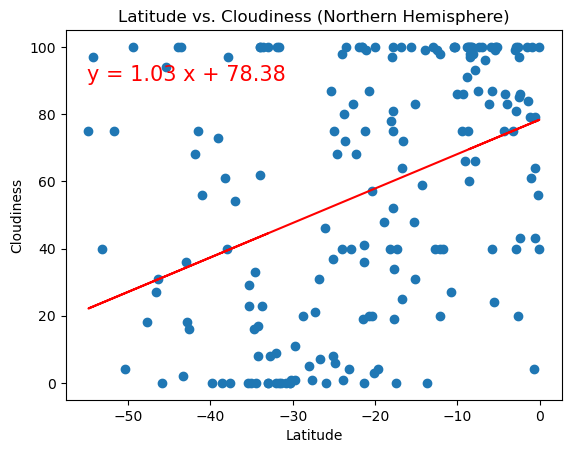

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
title = f"Latitude vs. Cloudiness (Northern Hemisphere)"

plot_linear_regression(x_values,y_values,title, (-55, 90))

**Discussion about the linear relationship:** There appears to be less clouds the closer you get to the equator, and more clouds farther out. The r-squared values suggest no correlation


### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.20766486164246828


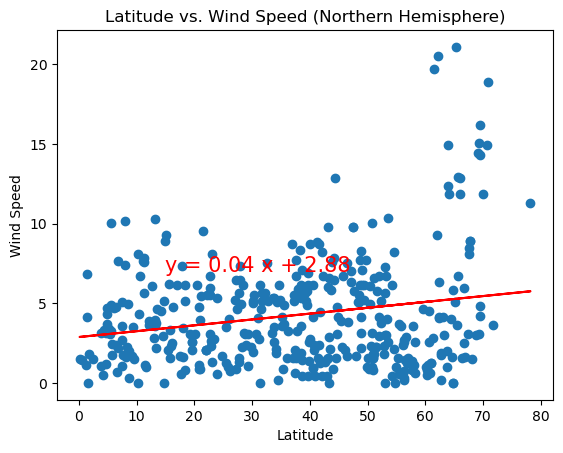

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
title = f"Latitude vs. Wind Speed (Northern Hemisphere)"

plot_linear_regression(x_values,y_values,title, (15, 7))

The r-squared is: -0.3824523120450791


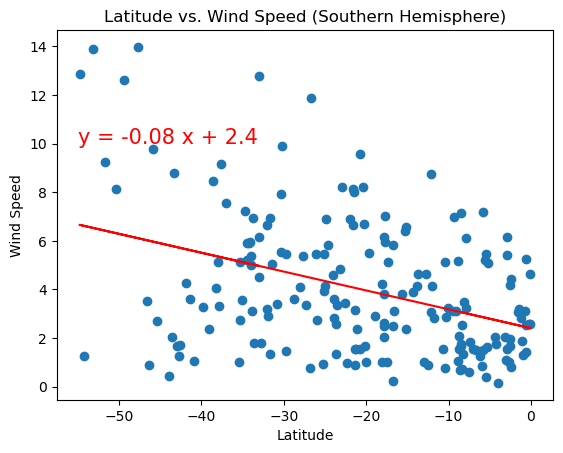

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
title = f"Latitude vs. Wind Speed (Southern Hemisphere)"

plot_linear_regression(x_values,y_values,title, (-55, 10))

""" 
**Discussion about the linear relationship:** The negative slope on the regression line of the southern hemisphere indicates that wind speed tends to decrease the closer we get to the 
equator. The negative r-squared value suggests that the the model does not provide useful information.
The r-squared relationship in the northern hemisphere suggests an almost non-existant correlation. 